In [1]:
#pip install geopandas

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import os

from shapely.geometry import Point

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Traigo la lista de archivos de mi carpeta data

In [2]:
# Get the list of all files and directories
path = "C://Users//MidasM2023//Documents//Python//data"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' C://Users//MidasM2023//Documents//Python//data ' :
['A872819.csv', 'accidents.csv', 'agricultura.csv', 'contacts.csv', 'Copia de RE-SP-Plantilla de Sprint Planning y Capacity - SPRINT CAPACITY.csv', 'Datos Meteorologicos NH0400 1961 2022-solo precipitaciones.xls', 'Datos Meteorologicos NH0400 1961 2022.xls', 'Datos-Meteorologicos-NH0400-1961-2022-solo-precipitaciones.csv', 'departamento.json', 'Dictionary.csv', 'energias-alternativas.csv', 'escuelasgeo.xls', 'FAOSTAT_data_es_4-5-2023.csv', 'flavors_of_cacao.csv', 'florence.csv', 'glassdoordata.csv', 'GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalTemperatures.csv', 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv', 'legumbres.csv', 'lineas_de_transporte_ferroviario_AN010.json', 'linea_de_limite_070111.json', 'maiz.csv', 'MarathonData.csv', 'nba_salary.sqlite', 'owid-covid-data.csv', 'pengu

In [3]:
#Leo archivos de provincias argentinas. fuente: www.ign.gob.ar
provincias = gpd.read_file(path + "//provincia.json")
provincias.head() 

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."


# dibujo a ver de que se trata

<Axes: >

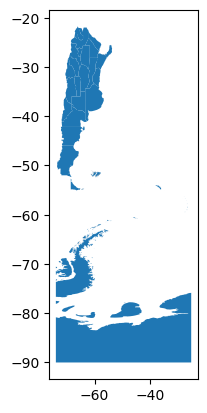

In [4]:
provincias.plot()

In [5]:
#filtro la provincia de neuquen
provincias_nqn = provincias.loc[provincias['nam'].str.contains("Neu")]
provincias_nqn.head()


,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."


In [6]:
#Leo archivos de departamentos arg. fuente: www.ign.gob.ar
departamentos = gpd.read_file(path + "//departamento.json")
departamentos.head()

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,2,Departamento,Departamento Federal,Departamento,Federal,30035,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57731 -30.69016, -58.57512..."
1,3,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,30056,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.13011 -33.02912, -58.13087..."
2,4,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,30063,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57589 -34.02675, -58.57593..."
3,5,Departamento,Departamento Victoria,Departamento,Victoria,30105,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-59.77158 -32.58791, -59.77198..."
4,6,Departamento,Departamento Diamante,Departamento,Diamante,30021,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-60.25784 -32.05170, -60.25723..."


In [7]:
#filtro los departamentos de la provincia de neuquen. 
# in1 = 58

departamentos['provincia'] = departamentos['in1'].str[:2] 
departamentos_nqn = departamentos[departamentos['provincia'].isin(['58'])]
departamentos_nqn.head()

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,provincia
118,187,Departamento,Departamento Picunches,Departamento,Picunches,58105,Direc. Pcial. de Catastro e Inf. Territorial,IGN,"MULTIPOLYGON (((-71.02216 -38.11255, -71.02139...",58
119,188,Departamento,Departamento Añelo,Departamento,Añelo,58014,Direc. Pcial. de Catastro e Inf. Territorial,IGN,"MULTIPOLYGON (((-68.26109 -37.70452, -68.25494...",58
126,184,Departamento,Departamento Los Lagos,Departamento,Los Lagos,58070,Direc. Pcial. de Catastro e Inf. Territorial,IGN,"MULTIPOLYGON (((-71.70874 -40.42252, -71.70859...",58
127,190,Departamento,Departamento Ñorquín,Departamento,Ñorquín,58084,Direc. Pcial. de Catastro e Inf. Territorial,IGN,"MULTIPOLYGON (((-71.15473 -37.24640, -71.15462...",58
137,115,Departamento,Departamento Picún Leufú,Departamento,Picún Leufú,58098,Direc. Pcial. de Catastro e Inf. Territorial,IGN,"MULTIPOLYGON (((-68.81976 -39.36885, -68.82396...",58


<Axes: >

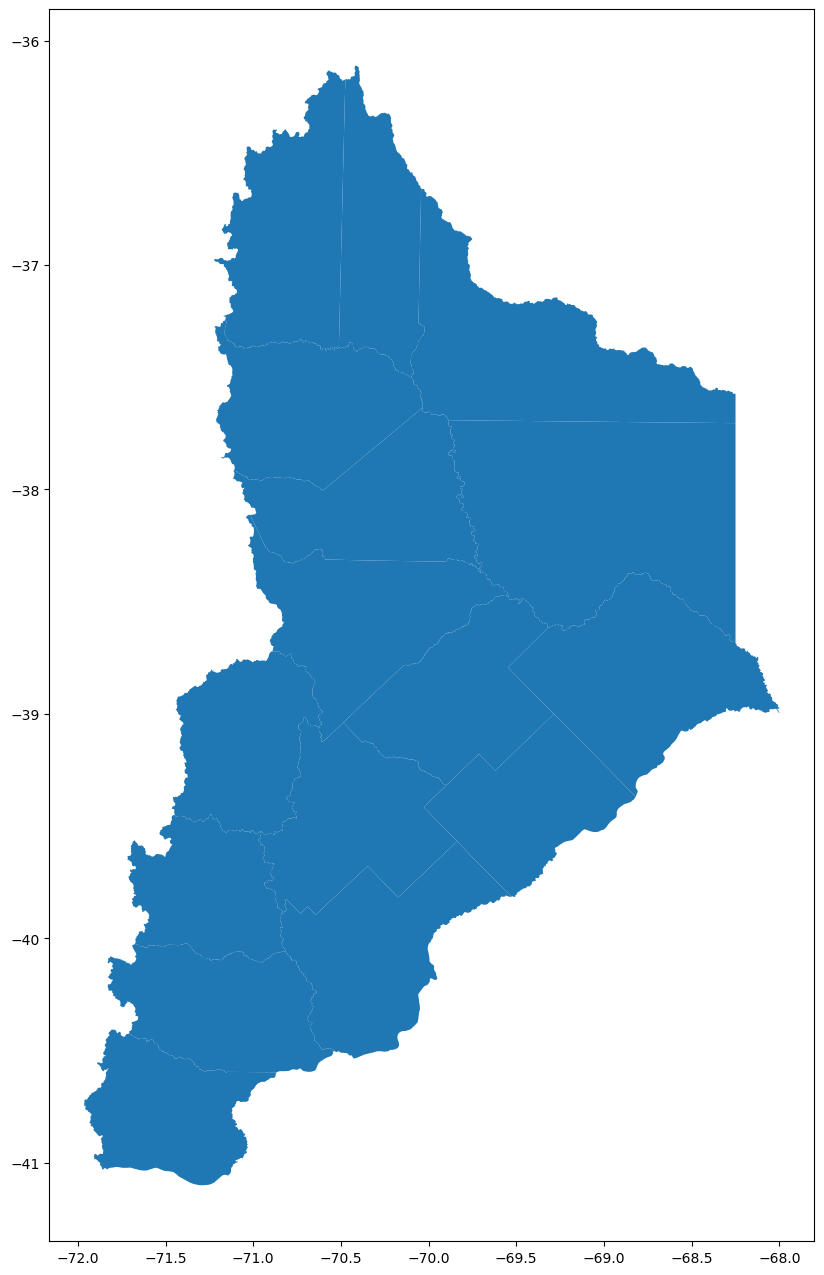

In [8]:
#dibujo los departamentos

fig, ax = plt.subplots(1, figsize=(15,16))
departamentos_nqn.plot(ax=ax)

In [9]:
#Leo archivos de limites arg. fuente: www.ign.gob.ar
limites = gpd.read_file(path + "//linea_de_limite_070111.json")
limites.head()

,gid,entidad,objeto,fna,nam,gna,vlj,fdc,sag,geometry
0,26,10.0,Límite Interprovincial,Córdoba - San Luis Tramo 05,Tramo 05,Córdoba - San Luis,1.0,Fallo del Presidente Julio A. Roca del 26nov1883.,IGN,"MULTILINESTRING ((-64.94355 -32.29799, -64.942..."
1,28,10.0,Límite Interprovincial,Río Negro - Buenos Aires Tramo 02,Tramo 02,Río Negro - Buenos Aires,2.0,Ley 18.331/69,IGN,"MULTILINESTRING ((-63.37935 -40.70977, -63.378..."
2,139,10.0,Límite Interprovincial,La Rioja - Catamarca Tramo 09,Tramo 09,La Rioja - Catamarca,1.0,Ley 18.533/69,IGN,"MULTILINESTRING ((-68.41589 -28.01250, -68.414..."
3,39,10.0,Límite Interprovincial,San Juan - Mendoza Tramo 01,Tramo 01,San Juan - Mendoza,1.0,Ley 22.200/80,IGN,"MULTILINESTRING ((-70.12620 -32.57415, -70.126..."
4,40,10.0,Límite Interprovincial,Neuquén - Mendoza Tramo 02,Tramo 02,Neuquén - Mendoza,2.0,Ley 1.532/1884,IGN,"MULTILINESTRING ((-68.25000 -37.57478, -68.250..."


In [10]:
limites['objeto'].unique()

array(['Límite Interprovincial'], dtype=object)

In [11]:
limites['gna'].unique()

array(['Córdoba - San Luis', 'Río Negro - Buenos Aires',
       'La Rioja - Catamarca', 'San Juan - Mendoza', 'Neuquén - Mendoza',
       'Mendoza - La Pampa', 'La Rioja - San Luis', 'Salta - Catamarca',
       'Santiago Del Estero - Tucumán', 'Jujuy - Salta',
       'La Rioja - San Juan', 'San Juan - San Luis',
       'Neuquén - Río Negro', 'Santiago Del Estero - Córdoba',
       'Chaco - Salta', 'Entre Ríos - Corrientes',
       'Buenos Aires - Santa Fe', 'Formosa - Chaco',
       'Corrientes - Misiones', 'Tucumán - Catamarca',
       'Entre Ríos - Santa Fe', 'Ciudad de Buenos Aires - Buenos Aires',
       'La Pampa - Río Negro', 'Salta - Tucumán',
       'Santiago Del Estero - Chaco', 'Catamarca - Santiago Del Estero',
       'La Pampa - San Luis', 'Mendoza - San Luis', 'La Rioja - Córdoba',
       'Catamarca - Córdoba', 'Buenos Aires - Entre Ríos',
       'Corrientes - Santa Fe', 'Santa Cruz - Chubut',
       'Córdoba - La Pampa', 'Chaco - Corrientes', 'Córdoba - Santa Fe',
       

In [12]:
limites_nqn = limites.loc[limites['gna'].str.contains("Neu")]
limites_nqn.head()


,gid,entidad,objeto,fna,nam,gna,vlj,fdc,sag,geometry
4,40,10.0,Límite Interprovincial,Neuquén - Mendoza Tramo 02,Tramo 02,Neuquén - Mendoza,2.0,Ley 1.532/1884,IGN,"MULTILINESTRING ((-68.25000 -37.57478, -68.250..."
15,123,10.0,Límite Interprovincial,Neuquén - Río Negro Tramo 03,Tramo 03,Neuquén - Río Negro,2.0,Ley 18.501/69,IGN,"MULTILINESTRING ((-68.25000 -37.70455, -68.250..."
21,171,10.0,Límite Interprovincial,Neuquén - Mendoza Tramo 01,Tramo 01,Neuquén - Mendoza,2.0,Ley 1.532/1884,IGN,"MULTILINESTRING ((-70.37063 -36.24018, -70.370..."
24,144,10.0,Límite Interprovincial,Neuquén - Río Negro Tramo 05,Tramo 05,Neuquén - Río Negro,2.0,Ley 18.501/69,IGN,"MULTILINESTRING ((-67.99809 -38.99576, -67.998..."
31,151,10.0,Límite Interprovincial,Neuquén - Río Negro Tramo 04,Tramo 04,Neuquén - Río Negro,2.0,Ley 18.501/69,IGN,"MULTILINESTRING ((-68.25000 -38.68200, -68.249..."


<Axes: >

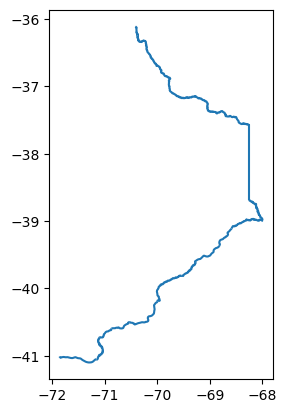

In [13]:
limites_nqn.plot()

In [14]:
# levanto archivo de datos de petroleo. fuente: http://datos.neuquen.gob.ar/
petroleo = gpd.read_file(path + "//prodpetro.csv")
petroleo.head()

,id,tipopozo,explotacion,latitud,longitud,z,ambiente,cuenca,area_legal,geometry
0,1,noconv,GAS,"-38,2489985","-69,2065238","530,4",TERRESTRE,NEUQUINA,AGUADA PICHANA,None
1,2,noconv,GAS,"-38,2566233","-69,1828038","468,3",TERRESTRE,NEUQUINA,AGUADA PICHANA,None
2,3,noconv,GAS,"-38,4110792","-69,2240441","500,6",TERRESTRE,NEUQUINA,AGUADA PICHANA,None
3,4,noconv,PET,"-38,8974889","-68,283634","278,57",TERRESTRE,NEUQUINA,CENTENARIO,None
4,5,noconv,GAS,"-38,2406365","-69,2222407","566,3",TERRESTRE,NEUQUINA,AGUADA PICHANA,None


In [15]:
petroleo.isnull()

,id,tipopozo,explotacion,latitud,longitud,z,ambiente,cuenca,area_legal,geometry
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
14136,False,False,False,False,False,False,False,False,False,True
14137,False,False,False,False,False,False,False,False,False,True
14138,False,False,False,False,False,False,False,False,False,True
14139,False,False,False,False,False,False,False,False,False,True


In [16]:
petroleo['tipopozo'].unique()


array(['noconv', 'conv'], dtype=object)

In [17]:
petroleo['tipopozo'].value_counts()

conv      13815
noconv      326
Name: tipopozo, dtype: int64

In [18]:
petroleo['explotacion'].unique()

array(['GAS', 'PET', 'OT', 'Sin Dato', '', 'IA', 'SUM', 'PYG', 'IG'],
      dtype=object)

In [19]:
petroleo['area_legal'].unique()

array(['AGUADA PICHANA', 'CENTENARIO', 'LOMA CAMPANA',
       'LOMA LA LATA - SIERRA BARROSA', 'OCTOGONO', 'AGUADA DE LA ARENA',
       'EL MANGRULLO', 'ANTICLINAL CAMPAMENTO', 'HUACALERA',
       'AGUADA BAGUALES', 'LOMA DEL MOJON',
       'REVERSION COVUNCO NORTE - RIM 10', 'CHIHUIDO DE LA SIERRA NEGRA',
       'MATA MORA', 'CNQ 14 - ZAPALA', 'LA AMARGA CHICA', 'LOMA AMARILLA',
       'AGUADA DE CASTRO', 'CORRALERA', 'AGUADA CHIVATO - AGUADA BOCAREY',
       'BAJO DEL TORO', 'LOS TOLDOS - BLOQUE II', 'LOMA DEL MOLLE',
       'RINCON LA CENIZA', 'EL OREJANO', 'SAN ROQUE',
       'LOMA JARILLOSA ESTE - PUESTO SILVA OESTE',
       'LOS TOLDOS - BLOQUE I', 'SIERRAS BLANCAS',
       'EL TRAPIAL - CURAMCHED', 'COVUNCO NORTE SUR - BLOQUE I',
       'AL NORTE DE LA DORSAL', 'BANDURRA', 'LA ESCALONADA',
       'AGUA DEL CAJON', 'BAJADA DEL PALO', 'LAS TACANAS', 'RIO NEUQUEN',
       'PAMPA DE LAS YEGUAS - BLOQUE I', 'CERRO HAMACA', 'LOS BASTOS',
       'PAMPA LAS YEGUAS - BLOQUE II', 'LA CALE

In [20]:
#convierto los puntos lat y long a float
petroleo['latitud'] = petroleo['latitud'].str.replace(',', '.').astype(float)
petroleo['longitud'] = petroleo['longitud'].str.replace(',', '.').astype(float)
petroleo.head()

,id,tipopozo,explotacion,latitud,longitud,z,ambiente,cuenca,area_legal,geometry
0,1,noconv,GAS,-38.248998,-69.206524,"530,4",TERRESTRE,NEUQUINA,AGUADA PICHANA,None
1,2,noconv,GAS,-38.256623,-69.182804,"468,3",TERRESTRE,NEUQUINA,AGUADA PICHANA,None
2,3,noconv,GAS,-38.411079,-69.224044,"500,6",TERRESTRE,NEUQUINA,AGUADA PICHANA,None
3,4,noconv,PET,-38.897489,-68.283634,"278,57",TERRESTRE,NEUQUINA,CENTENARIO,None
4,5,noconv,GAS,-38.240637,-69.222241,"566,3",TERRESTRE,NEUQUINA,AGUADA PICHANA,None


In [23]:
#grafico los pozos
geometry = [Point(xy) for xy in zip(petroleo.longitud, petroleo.latitud)]
petroleo_gdf = gpd.GeoDataFrame(petroleo, crs="EPSG:4326", geometry=geometry)

In [24]:
petroleo_gdf

,id,tipopozo,explotacion,latitud,longitud,z,ambiente,cuenca,area_legal,geometry
0,1,noconv,GAS,-38.248998,-69.206524,"530,4",TERRESTRE,NEUQUINA,AGUADA PICHANA,POINT (-69.20652 -38.24900)
1,2,noconv,GAS,-38.256623,-69.182804,"468,3",TERRESTRE,NEUQUINA,AGUADA PICHANA,POINT (-69.18280 -38.25662)
2,3,noconv,GAS,-38.411079,-69.224044,"500,6",TERRESTRE,NEUQUINA,AGUADA PICHANA,POINT (-69.22404 -38.41108)
3,4,noconv,PET,-38.897489,-68.283634,"278,57",TERRESTRE,NEUQUINA,CENTENARIO,POINT (-68.28363 -38.89749)
4,5,noconv,GAS,-38.240637,-69.222241,"566,3",TERRESTRE,NEUQUINA,AGUADA PICHANA,POINT (-69.22224 -38.24064)
...,...,...,...,...,...,...,...,...,...,...
14136,14147,conv,PET,-38.934235,-68.171222,"272,13",TERRESTRE,NEUQUINA,CENTENARIO,POINT (-68.17122 -38.93424)
14137,14148,conv,PET,-38.934176,-68.171730,"270,89",TERRESTRE,NEUQUINA,CENTENARIO,POINT (-68.17173 -38.93418)
14138,14149,conv,GAS,-38.915105,-68.226730,"364,81",TERRESTRE,NEUQUINA,CENTENARIO,POINT (-68.22673 -38.91511)
14139,14150,conv,,-39.054785,-68.673508,337,TERRESTRE,NEUQUINA,SENILLOSA,POINT (-68.67351 -39.05479)


<Axes: >

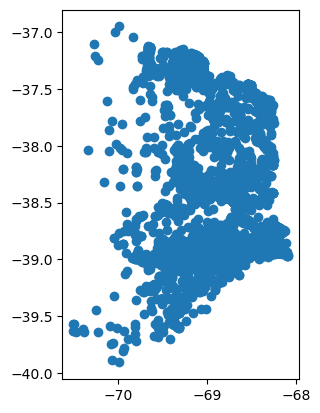

In [25]:
# Plot de los pozos
petroleo_gdf.plot()

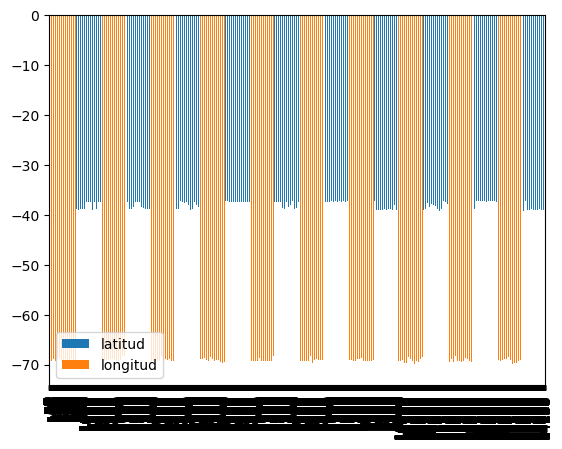

In [31]:
ax = petroleo_gdf.plot.bar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

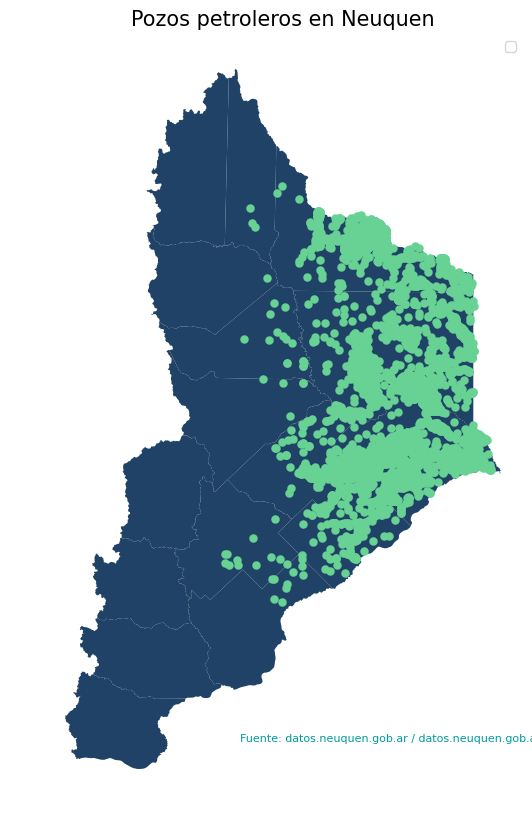

In [26]:
fig, ax = plt.subplots(1, figsize=(10,10))

base = departamentos_nqn.plot(ax=ax, color='#1f4266')
petroleo_gdf.plot(ax=base, color='#67d294',linewidth=0.1)
#f3ff82

ax.set_title('Pozos petroleros en Neuquen', fontdict={'fontsize':'15', 'fontweight':'3'})

ax.axis('off')

ax.annotate('Fuente: datos.neuquen.gob.ar / datos.neuquen.gob.ar', xy=(0.39,0.10), xycoords='figure fraction', horizontalalignment='center'
            ,verticalalignment='top', fontsize=8, color='#009a9c')

plt.legend(loc='upper right')

plt.plot()

In [27]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

NameError: name 'geopandas' is not defined

In [ ]:
# Plot the GeoDataFrame
ax = petroleo_gdf.plot()

# Add a marker to the plot at a specific location
lat, lon = -38.248998, -69.206524

plt.plot(lon, lat, 'ro', markersize=10)

In [ ]:

pip install mplleaflet

In [ ]:
import mplleaflet

In [ ]:

# Plot the GeoDataFrame
ax = petroleo_gdf.plot()

# Add a marker to the plot at a specific location with a tooltip
lat, lon = -38.248998, -69.206524
tooltip = 'My tooltip text'
plt.plot(lon, lat, 'ro', markersize=10, alpha=0.7, label=tooltip)

# Add the tooltip to the marker using mplleaflet
mplleaflet.display()

In [ ]:



# Create a map centered on Neuquen
neuquen_map = folium.Map(location=[-38.95, -68.1], zoom_start=8)

# Add a marker for each well
for i, row in df.iterrows():
    # Extract the well information
    lat = row['latitud']
    lon = row['longitud']
    area_legal = row['area_legal']

    # Create a marker at the well's location with an on-hover label indicating the area_legal
    tooltip = f"Area Legal: {area_legal}"
    folium.Marker(location=[lat, lon], tooltip=tooltip).add_to(neuquen_map)
